In [1]:
import sys
import os

# Adicionar o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Vai um nível acima de "notebooks"
sys.path.append(project_root)

print("Diretório raiz do projeto adicionado ao sys.path:", project_root)

Diretório raiz do projeto adicionado ao sys.path: c:\Users\João\OneDrive\Documentos\project


In [3]:
# 📦 Imports principais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Para o balanceamento
from sklearn.model_selection import train_test_split

# Configurações de exibição
pd.set_option("display.float_format", "{:.2f}".format)
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [7]:
# 📂 Carregar o dataset processado
processed_path = "../dataset/processed/data_with_outliers.csv"
df = pd.read_csv(processed_path, parse_dates=["Date"])

# Resumo inicial
print("\n✅ Dataset carregado!")
print(df.info())

# Verificar a distribuição inicial das classes
print("\n📊 Distribuição Inicial das Classes:")
print(df["Status"].value_counts())


✅ Dataset carregado!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17211 entries, 0 to 17210
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17211 non-null  datetime64[ns]
 1   Country    17211 non-null  object        
 2   Status     17211 non-null  object        
 3   AQI Value  17211 non-null  float64       
 4   Outlier    17211 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 554.8+ KB
None

📊 Distribuição Inicial das Classes:
Status
Good                              8210
Moderate                          6237
Unhealthy For Sensitive Groups    1785
Unhealthy                          759
Very Unhealthy                     140
Hazardous                           80
Name: count, dtype: int64


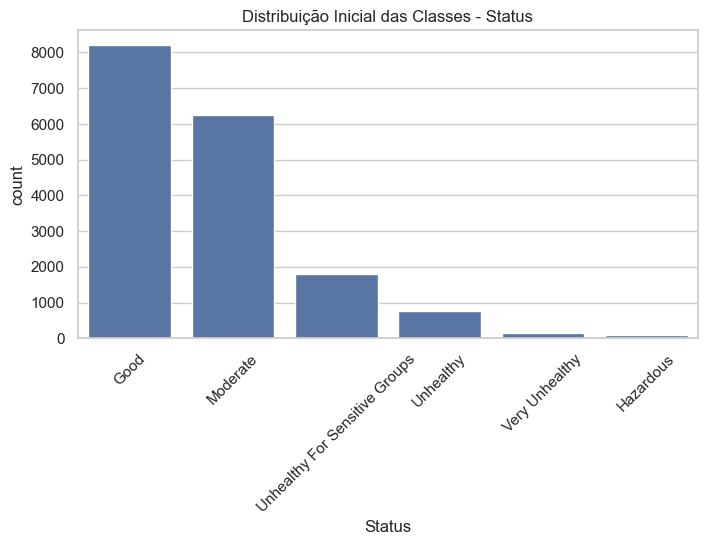

In [8]:
# Gráfico de barras para distribuição das classes
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Status", order=df["Status"].value_counts().index)
plt.title("Distribuição Inicial das Classes - Status")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Selecionar apenas as colunas numéricas para X
X = df.drop(columns=["Status", "Date", "Country"])  # Remove colunas não numéricas
y = df["Status"]

# Dividir em treino e teste para balancear apenas o conjunto de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes
print("\n📊 Nova Distribuição das Classes no Treinamento:")
print(pd.Series(y_train_balanced).value_counts())



📊 Nova Distribuição das Classes no Treinamento:
Status
Moderate                          6568
Unhealthy For Sensitive Groups    6568
Good                              6568
Unhealthy                         6568
Very Unhealthy                    6568
Hazardous                         6568
Name: count, dtype: int64


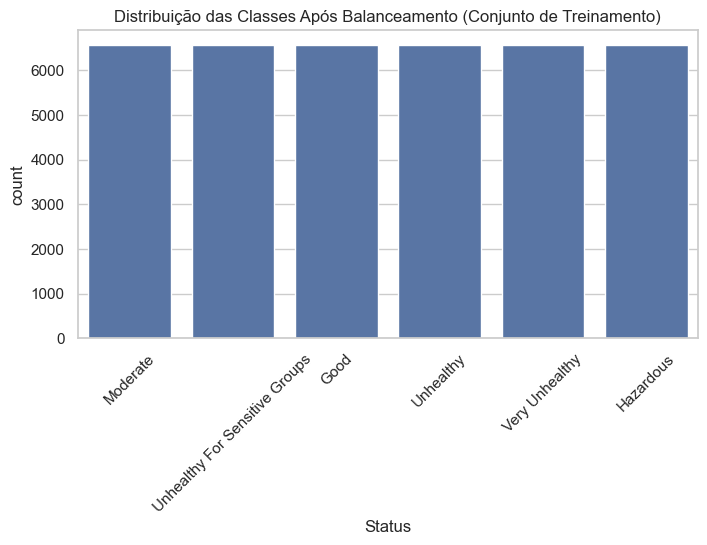

In [11]:
# Gráfico da nova distribuição
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_balanced, order=pd.Series(y_train_balanced).value_counts().index)
plt.title("Distribuição das Classes Após Balanceamento (Conjunto de Treinamento)")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Criar o dataset balanceado
df_balanced = pd.concat([pd.DataFrame(X_train_balanced, columns=X_train.columns), pd.Series(y_train_balanced, name="Status")], axis=1)

# Salvar o dataset balanceado
balanced_path = "../dataset/processed/data_balanced.csv"
df_balanced.to_csv(balanced_path, index=False, encoding="utf-8")
print(f"✅ Dataset balanceado salvo em: {balanced_path}")


✅ Dataset balanceado salvo em: ../dataset/processed/data_balanced.csv
